<h1 style="text-align: center; color: #4A90E2;">INNOV8: The Space Saga</h1>
<h2 style="text-align: center; color: #E94E77;">ARIES IITD and Eightfold.ai</h2>


### Part 1: Decoding and Classifying Alien Communications

Dataset (Alien Messages Corpus)
The intercepted transmissions are structured as follows:
- Message: The alien communication in text form.
- Species: The species that sent the message.
- Number of Fingers: The typical number of fingers for the species.
- Tail: A yes/no field indicating whether the species has a tail.

### <h2 style="text-align: center; color: #8B8000;">Table of Contents</h2>

<ul>
    <li><a href="#eda">1. EDA</a></li>
    <li><a href="#preprocessing-dataset">2. Preprocessing Dataset</a></li>
    <li><a href="#prerocessing">3. Preprocessing</a></li>
    <li><a href="#model-explanation">4. Model Explanation</a></li>
    <li><a href="#overfitting-analysis">5. Overfitting Analysis</a></li>
    <li><a href="#final-training">6. Final Training</a></li>
</ul>

### <h2 id="eda" style="text-align: center">1. EDA</h2>

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [329]:
print("Basic Information: \n\n")
print(df.info())
print("\nSummary Statistics: \n\n")
print(df.describe())
df.head()

Basic Information: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  500 non-null    object
 1   fingers  500 non-null    int64 
 2   tail     500 non-null    object
 3   species  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB
None

Summary Statistics: 


          fingers
count  500.000000
mean     3.688000
std      1.792507
min      0.000000
25%      2.000000
50%      4.000000
75%      5.000000
max      9.000000


,message,fingers,tail,species
0,pluvia arbor aquos,4,no,Aquari
1,cosmix xeno nebuz odbitaz,5,yes,Zorblax
2,solarix glixx novum galaxum quasar,5,yes,Zorblax
3,arbor insectus pesros ekos dootix nimbus,2,yes,Florian
4,mermax drakos lorix epikoz deftax,4,no,Faerix


In [330]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
message    0
fingers    0
tail       0
species    0
dtype: int64


In [331]:
print("\nSpecies Distribution:")
print(df['species'].value_counts())


Species Distribution:
species
Quixnar     60
Cybex       55
Emotivor    54
Florian     52
Zorblax     51
Mythron     50
Aquari      48
Sentire     44
Faerix      43
Nexoon      43
Name: count, dtype: int64


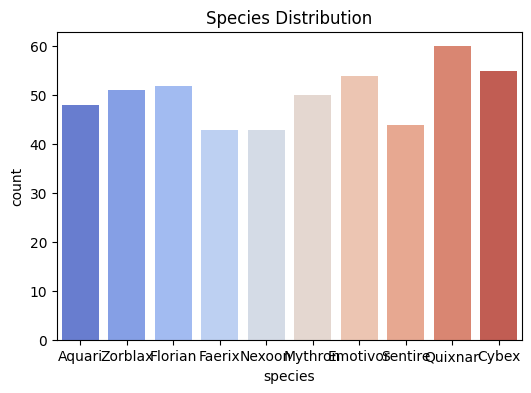

In [332]:
unique_species = df['species'].unique()
colors = sns.color_palette("coolwarm", len(unique_species))

plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df, hue='species', palette=colors, legend=False)
plt.title('Species Distribution')
plt.show()

In [333]:
df[df['species']=='Aquari']

,message,fingers,tail,species
0,pluvia arbor aquos,4,no,Aquari
17,gaiax arbor faunar insectus,5,no,Aquari
23,solux terranix faunar rootix pollex pluvia gai...,3,no,Aquari
43,faunar foliar pollex floraz floraz haunar,5,no,Aquari
49,zephyr gaiax pollex leafon floraz aquos ventus,2,no,Aquari
53,faunar aquos pluvia,3,no,Aquari
56,pallex rootix floran petros aviana pluvia faun...,4,yes,Aquari
83,faunar foliar pluvia,3,no,Aquari
89,aviana aquos biompr ekos leafon terranix,4,yes,Aquari
137,sporlom floraz floran pollex rootix seepod,2,no,Aquari


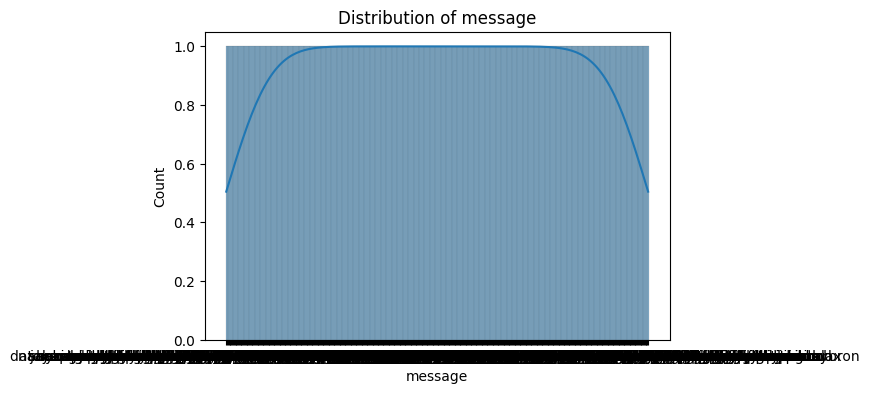

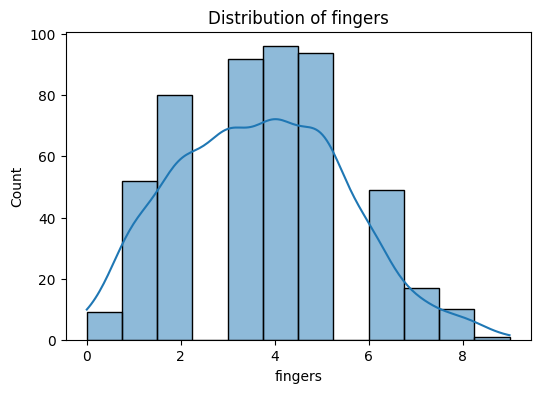

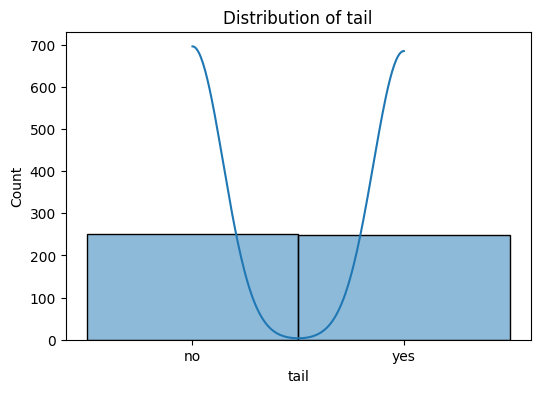

In [334]:
features = ['message', 'fingers', 'tail']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


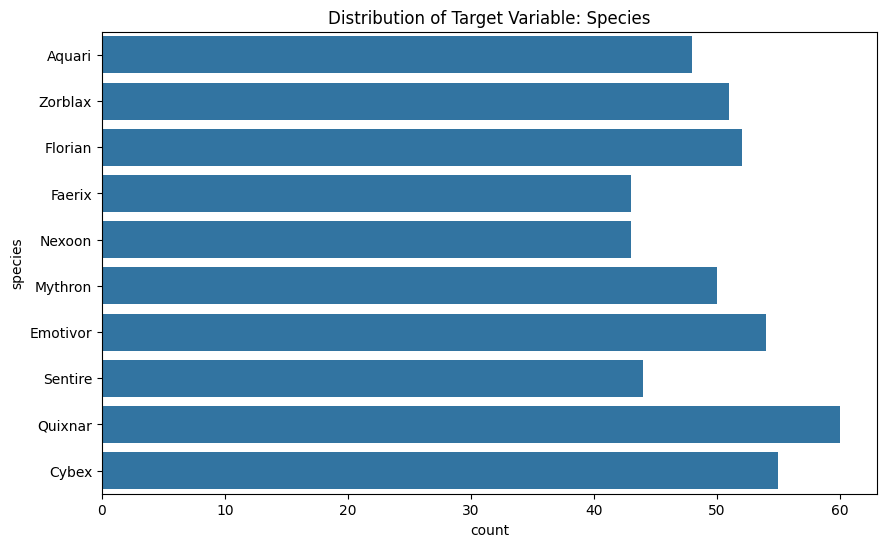

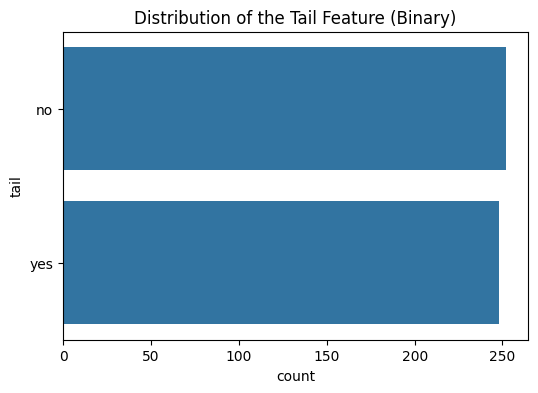

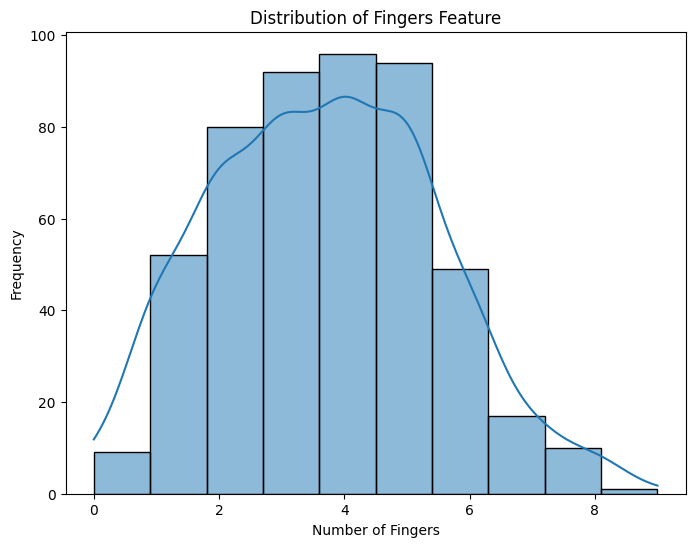

In [335]:
# Visualizing the target variable 'species'
plt.figure(figsize=(10, 6))
sns.countplot(df['species'])
plt.title('Distribution of Target Variable: Species')
plt.show()



# Visualizing the 'tail' column distribution
plt.figure(figsize=(6, 4))
sns.countplot(df['tail'])
plt.title('Distribution of the Tail Feature (Binary)')
plt.show()

# Visualizing the distribution of the 'fingers' feature
plt.figure(figsize=(8, 6))
sns.histplot(df['fingers'], kde=True, bins=10)
plt.title('Distribution of Fingers Feature')
plt.xlabel('Number of Fingers')
plt.ylabel('Frequency')
plt.show()

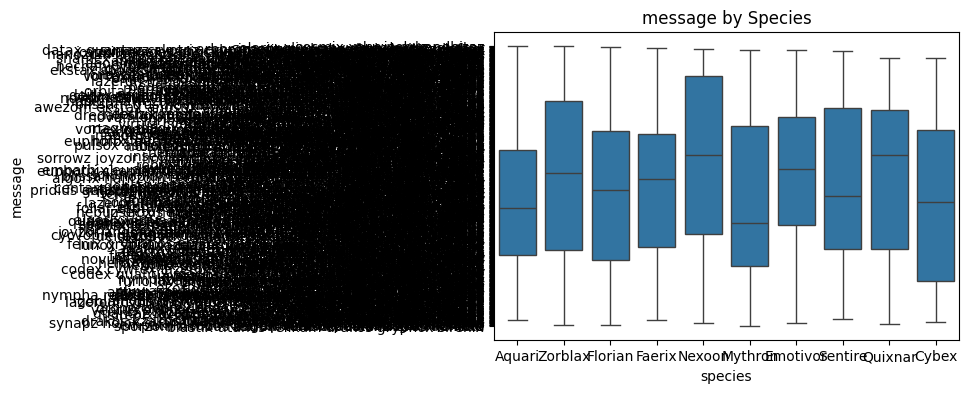

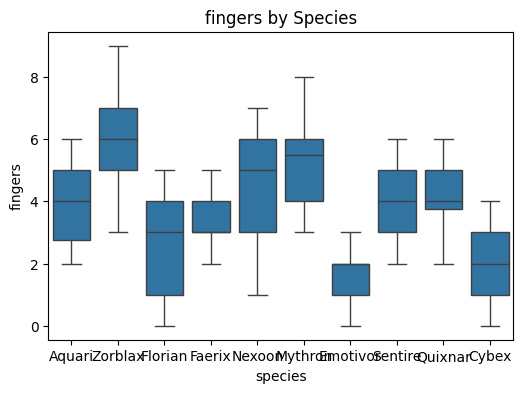

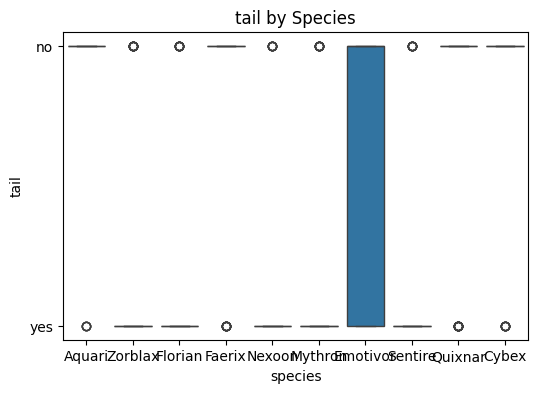

In [336]:
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by Species')
    plt.show()


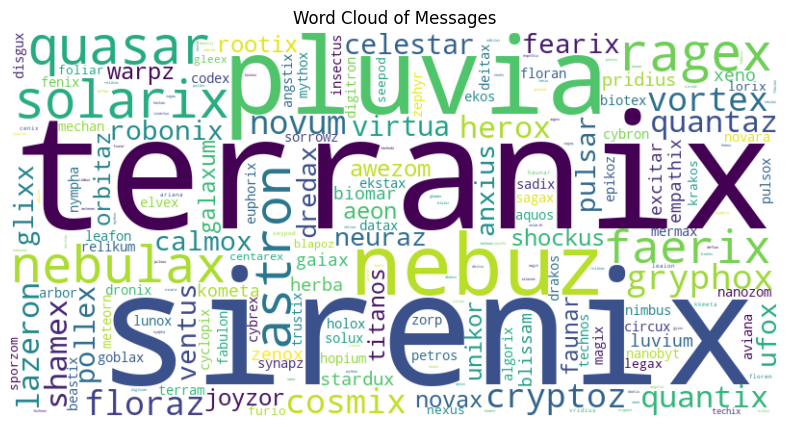

In [337]:
from wordcloud import WordCloud

text = " ".join(df['message'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()

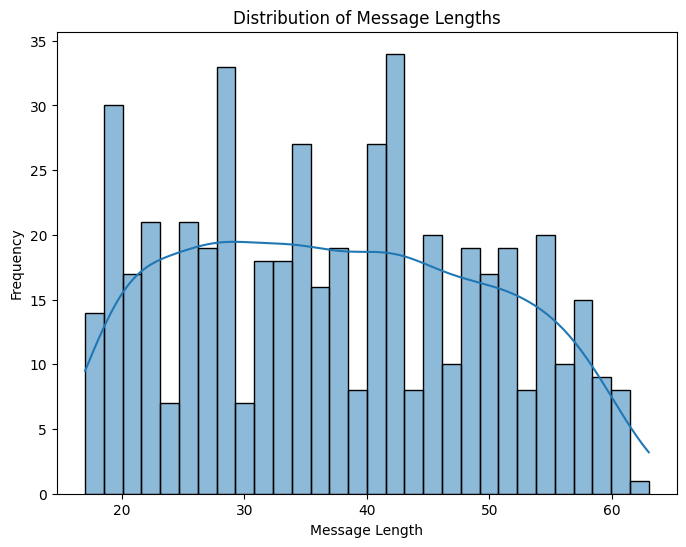


Species Class Distribution:
species
Quixnar     60
Cybex       55
Emotivor    54
Florian     52
Zorblax     51
Mythron     50
Aquari      48
Sentire     44
Faerix      43
Nexoon      43
Name: count, dtype: int64


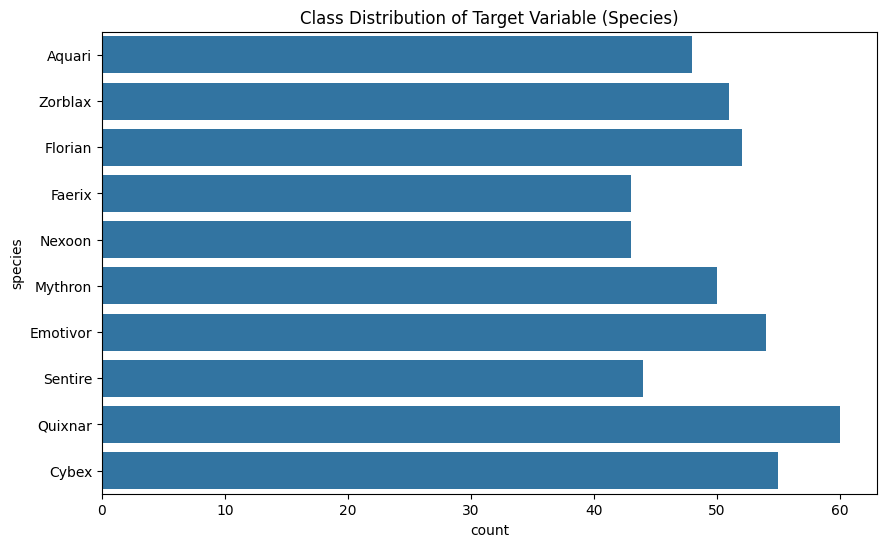

In [338]:
df['message_length'] = df['message'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(df['message_length'], bins=30, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

print("\nSpecies Class Distribution:")
print(df['species'].value_counts())


plt.figure(figsize=(10, 6))
sns.countplot(df['species'])
plt.title('Class Distribution of Target Variable (Species)')
plt.show()

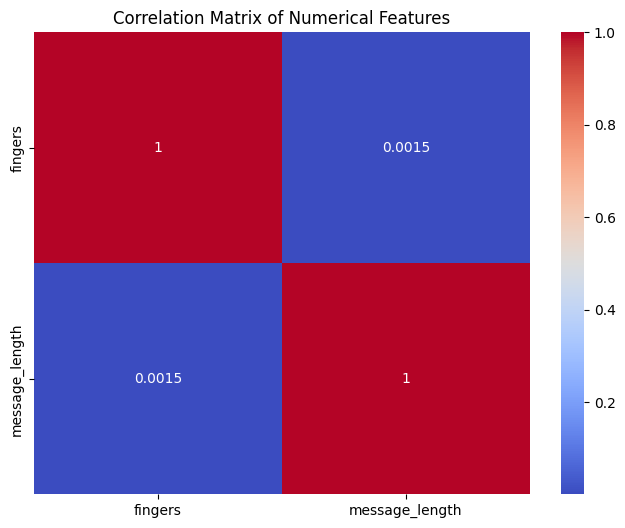

In [339]:
numeric_data = df.select_dtypes(include=[float, int])

# Correlation Matrix for Numerical Features
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

df.drop("message_length", axis=1, inplace=True)


<p style="color:#FF4500;">
Here are five key observations from the Exploratory Data Analysis (EDA):
<br><br>
<strong>No Missing Data:</strong> There are no missing values in any of the columns (message, fingers, tail, and species). 
<br><br>
<strong>Species Distribution:</strong> The dataset contains 10 distinct species, with the species counts ranging from 43 to 60. The most common species is Quixnar (60 occurrences), and the least common are Faerix and Nexoon (43 occurrences each).
<br><br>
<strong>Fingers Summary:</strong> The number of fingers ranges from 0 to 9, with an average of approximately 3.69 fingers. The majority of individuals have between 2 and 5 fingers, with a standard deviation of 1.79.
<br><br>
<strong>Tail and Fingers Correlation:</strong> Species like Zorblax and Mythron tend to have more fingers (mean of 5.69 and 5.42, respectively) and usually possess tails. Conversely, Cybex and Emotivor have fewer fingers (mean around 1.6 to 1.8), with fewer individuals having tails.
<br><br>
<strong>Unique Messages per Species:</strong> Each species has a unique set of message entries, with Quixnar having the highest number of unique messages (60) and Faerix and Nexoon the lowest (43 each). This could imply a strong relationship between species and the diversity of the message content.
</p>


### <h2 id="preprocessing-dataset" style="text-align: center">2. Preprocessing Dataset</h2>


In [340]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  500 non-null    object
 1   fingers  500 non-null    int64 
 2   tail     500 non-null    object
 3   species  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB
None


In [341]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])

words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_with_words = pd.concat([df.drop(columns=['message']), words_df], axis=1)
df_with_words

,fingers,tail,species,acon,aeon,aeop,aeqn,afgstix,airenix,akiana,...,zenrx,zephyr,zeqox,zgphyr,znikor,zolp,zorf,zorp,zquos,zyrp
0,4,no,Aquari,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,yes,Zorblax,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,yes,Zorblax,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,yes,Florian,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,no,Faerix,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,no,Emotivor,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,no,Quixnar,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,6,yes,Zorblax,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,2,yes,Florian,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [342]:
word_columns = [col for col in df_with_words.columns if col not in ['fingers', 'tail', 'species','message']]
print(len(word_columns))

636


<p style="color:#FF4500;">That means there are 636 unique words, and there may be a few words that are not required, whose frequency is one in the entire dataset.</p>


In [343]:
for column in word_columns:
    if df_with_words[column].sum() == 1:
        df_with_words.drop(column, axis=1, inplace=True)


print(df_with_words.shape)

(500, 136)


In [344]:
word_columns = [col for col in df_with_words.columns if col not in ['fingers', 'tail', 'species','message']]
len(word_columns)

133

<p style="color:#FF4500;">Re-adding those to form the message after dropping the useless words.</p>


In [345]:
word_columns = [col for col in df_with_words.columns if col not in ['fingers', 'tail', 'species','message']]

df_with_words['message'] = df_with_words[word_columns].apply(lambda row: ' '.join([word for word in word_columns if row[word] == 1]), axis=1)

print(df_with_words[['message', 'fingers', 'tail', 'species']].head())

print("\nShape of DataFrame after dropping word columns:", df_with_words.shape)

df_with_words

                              message  fingers tail  species
0                  aquos arbor pluvia        4   no   Aquari
1                   cosmix nebuz xeno        5  yes  Zorblax
2  galaxum glixx novum quasar solarix        5  yes  Zorblax
3          arbor ekos insectus nimbus        2  yes  Florian
4          drakos epikoz lorix mermax        4   no   Faerix

Shape of DataFrame after dropping word columns: (500, 137)


,fingers,tail,species,aeon,algorix,angstix,anxius,aquos,arbor,ariana,...,ventus,virtua,vortex,vridius,warpz,xeno,zenox,zephyr,zorp,message
0,4,no,Aquari,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,aquos arbor pluvia
1,5,yes,Zorblax,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,cosmix nebuz xeno
2,5,yes,Zorblax,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,galaxum glixx novum quasar solarix
3,2,yes,Florian,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,arbor ekos insectus nimbus
4,4,no,Faerix,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drakos epikoz lorix mermax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,no,Emotivor,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,disgux dredax empathix excitar pridius sadix
496,4,no,Quixnar,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,meteorn nebulax quasar
497,6,yes,Zorblax,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,kometa xeno
498,2,yes,Florian,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,aviana ekos nimbus sporzom terram terranix


In [346]:
df_nes_columns=df_with_words[['message', 'fingers', 'tail', 'species']]
df_nes_columns.drop(columns='tail')
df_nes_columns['tail']=df['tail']
df_nes_columns

C:\Users\Legion\AppData\Local\Temp\ipykernel_33476\3454013544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nes_columns['tail']=df['tail']


,message,fingers,tail,species
0,aquos arbor pluvia,4,no,Aquari
1,cosmix nebuz xeno,5,yes,Zorblax
2,galaxum glixx novum quasar solarix,5,yes,Zorblax
3,arbor ekos insectus nimbus,2,yes,Florian
4,drakos epikoz lorix mermax,4,no,Faerix
...,...,...,...,...
495,disgux dredax empathix excitar pridius sadix,2,no,Emotivor
496,meteorn nebulax quasar,4,no,Quixnar
497,kometa xeno,6,yes,Zorblax
498,aviana ekos nimbus sporzom terram terranix,2,yes,Florian


In [347]:
output_file_path = 'modified_data.csv'
df_nes_columns.to_csv(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

DataFrame saved to modified_data.csv


### <h2 id="prerocessing" style="text-align: center">3. Preprocessing</h2>


In [348]:
data=df_nes_columns

C:\Users\Legion\AppData\Local\Temp\ipykernel_33476\1076605153.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tail'] = data['tail'].map({'yes': 1, 'no': 0})


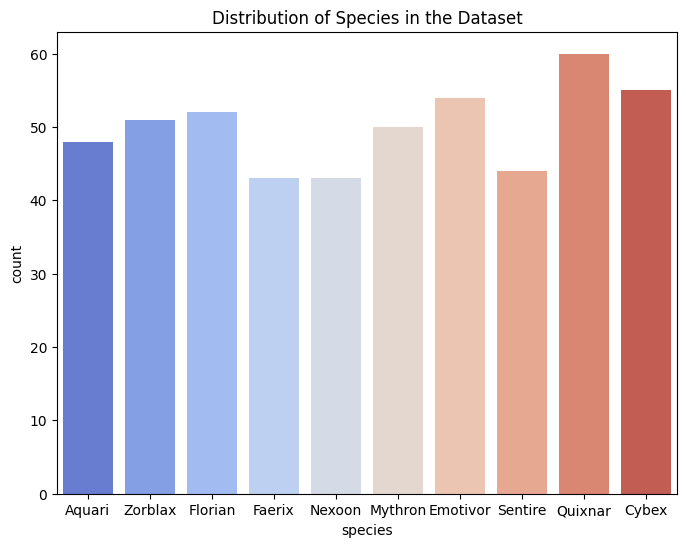

In [349]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'tail' column to numeric
data['tail'] = data['tail'].map({'yes': 1, 'no': 0})

# Apply TFIDF on the 'message' column
vectorizer = TfidfVectorizer(max_features=1000)
message_vectors = vectorizer.fit_transform(data['message'])

# Convert to DataFrame for easy plotting
tfidf_df = pd.DataFrame(message_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Add the target 'species' column to the DataFrame
tfidf_df['species'] = data['species']

# Plot the distribution of species
plt.figure(figsize=(8,6))
sns.countplot(x='species', data=tfidf_df, hue='species', palette=colors, legend=False)
plt.title('Distribution of Species in the Dataset')
plt.show()

In [350]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = TfidfVectorizer(max_features=1000)
message_vectors = vectorizer.fit_transform(data['message'])

X = pd.concat(
    [
        data[['fingers', 'tail']].reset_index(drop=True),
        pd.DataFrame(
            message_vectors.toarray(), columns=vectorizer.get_feature_names_out()
        ),
    ],
    axis=1,
)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['species'])
data.head()

,message,fingers,tail,species
0,aquos arbor pluvia,4,0,Aquari
1,cosmix nebuz xeno,5,1,Zorblax
2,galaxum glixx novum quasar solarix,5,1,Zorblax
3,arbor ekos insectus nimbus,2,1,Florian
4,drakos epikoz lorix mermax,4,0,Faerix


In [351]:
X.head()

,fingers,tail,aeon,algorix,angstix,anxius,aquos,arbor,ariana,astron,...,unikor,ventus,virtua,vortex,vridius,warpz,xeno,zenox,zephyr,zorp
0,4,0,0.0,0.0,0.0,0.0,0.588185,0.571856,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,5,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.60884,0.0,0.0,0.0
2,5,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
3,2,1,0.0,0.0,0.0,0.0,0.000000,0.480884,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,4,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


In [352]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### <h2 id="model-explanation" style="text-align: center">4. Model Explanation</h2>


In [353]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

Logistic Regression

In [354]:
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression(C= 2.229781329304629,
 class_weight= None,
 dual= False,
 fit_intercept= True,
 intercept_scaling= 1,
 l1_ratio=None,
 max_iter= 1000,
 multi_class= 'auto',
 n_jobs= None,
 penalty='l2',
 random_state= None,
 solver= 'liblinear',
 tol= 0.0001,
 verbose= 0,
 warm_start= False).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [355]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 88.00%
Recall: 88.00%
Precision: 90.06%
F1-Score: 88.05%
time to train: 0.01 s
time to predict: 0.00 s
total: 0.01 s


Decision Tree Classifier

In [356]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 57.00%
Recall: 57.00%
Precision: 63.07%
F1-Score: 57.58%
time to train: 0.01 s
time to predict: 0.00 s
total: 0.01 s


ExtraTreesClassifier

In [357]:
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model_best = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model_best.predict(X_test)
end_predict = time.time()
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 82.00%
Recall: 82.00%
Precision: 84.42%
F1-Score: 82.09%
time to train: 0.23 s
time to predict: 0.05 s
total: 0.28 s


Random Forest_optimized

In [358]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [359]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
start = time.time()
rf_randomcv.fit(X_train,y_train)
end = time.time()

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
105 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_co

In [360]:
best_random_grid=rf_randomcv.best_estimator_
print(best_random_grid)
start_predict = time.time()
y_predictions = best_random_grid.predict(X_test)
end_predict = time.time()

accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start_predict)+" s")
model_performance.loc['Random Forest_optimized'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start_predict]

RandomForestClassifier(criterion='entropy', max_depth=560, max_features='log2',
                       min_samples_split=5, n_estimators=2000)
Accuracy: 86.00%
Recall: 86.00%
Precision: 87.87%
F1-Score: 85.94%
time to train: -83.45 s
time to predict: 83.56 s
total: 0.12 s


RandomForestClassifier

In [361]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model1 = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [362]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 57.00%
Recall: 57.00%
Precision: 63.07%
F1-Score: 57.58%
time to train: 0.22 s
time to predict: 0.00 s
total: 0.22 s


GradientBoostingClassifier

In [363]:
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 68.00%
Recall: 68.00%
Precision: 69.18%
F1-Score: 67.81%
time to train: 1.96 s
time to predict: 0.00 s
total: 1.97 s


MLPClassifier

In [364]:
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (20,20,),
                      activation='relu',
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [365]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['MLP'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 81.00%
Recall: 81.00%
Precision: 83.94%
F1-Score: 80.77%
time to train: 0.56 s
time to predict: 0.00 s
total: 0.57 s


In [366]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
!pip install -q keras_metrics
from keras import metrics
import keras_metrics as km
import keras
import numpy as np
from numpy import array

In [367]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    # One-hot encode y_true
    y_true = K.cast(K.one_hot(K.cast(y_true, 'int32'), num_classes=K.shape(y_pred)[-1]), 'float32')
    y_pred = K.cast(y_pred, 'float32')

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    # One-hot encode y_true
    y_true = K.cast(K.one_hot(K.cast(y_true, 'int32'), num_classes=K.shape(y_pred)[-1]), 'float32')
    y_pred = K.cast(y_pred, 'float32')

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


In [368]:
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=135, activation='relu')) 
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax'))  #
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy', f1_m, precision_m, recall_m]
                 )
    return model

# Instantiate the model
model = build_model()
start = time.time()
model.fit(X_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

Epoch 1/200


c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 1s - 1s/step - accuracy: 0.0000e+00 - f1_m: 0.0000e+00 - loss: 2.9969 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 2/200
1/1 - 0s - 30ms/step - accuracy: 0.0000e+00 - f1_m: 0.0000e+00 - loss: 2.9865 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 3/200
1/1 - 0s - 31ms/step - accuracy: 0.0025 - f1_m: 0.0000e+00 - loss: 2.9761 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 4/200
1/1 - 0s - 32ms/step - accuracy: 0.0025 - f1_m: 0.0000e+00 - loss: 2.9659 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 5/200
1/1 - 0s - 30ms/step - accuracy: 0.0050 - f1_m: 0.0000e+00 - loss: 2.9557 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 6/200
1/1 - 0s - 37ms/step - accuracy: 0.0100 - f1_m: 0.0000e+00 - loss: 2.9455 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 7/200
1/1 - 0s - 28ms/step - accuracy: 0.0150 - f1_m: 0.0000e+00 - loss: 2.9355 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 8/200
1/1 - 0s - 29ms/step - accuracy: 0.0200 - f1_m: 0

In [369]:
#Evaluate the neural network
loss, accuracy, f1s, precision, recall = model.evaluate(X_test, y_test)
end_predict = time.time()
model_performance.loc['MLP (Keras)'] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6925 - f1_m: 0.6827 - loss: 0.6904 - precision_m: 0.8054 - recall_m: 0.5938  


GRU Keras

In [370]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import numpy as np
import time

# Build the GRU-based model
def build_model():
    model = Sequential()
    model.add(GRU(20, return_sequences=True, input_shape=(1, 135)))
    model.add(GRU(20, return_sequences=False))  # Removed return_sequences from second GRU
    model.add(Dense(10, activation='softmax'))  # For multiclass classification
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

# Reshape the input data
X_train_array = np.array(X_train)  # Ensure this is a numpy array
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], 1, 135)

# Reshape test data
X_test_array = np.array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], 1, 135)

# Instantiate the model
model = build_model()

# Fit the model
start = time.time()
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000, verbose=2)
end_train = time.time()

# Print the time taken for training
print("Training time:", end_train - start)


Epoch 1/200


c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 - 3s - 3s/step - accuracy: 0.0825 - loss: 2.3047
Epoch 2/200
1/1 - 0s - 34ms/step - accuracy: 0.0950 - loss: 2.3023
Epoch 3/200
1/1 - 0s - 35ms/step - accuracy: 0.1025 - loss: 2.2999
Epoch 4/200
1/1 - 0s - 37ms/step - accuracy: 0.1250 - loss: 2.2975
Epoch 5/200
1/1 - 0s - 33ms/step - accuracy: 0.1350 - loss: 2.2951
Epoch 6/200
1/1 - 0s - 37ms/step - accuracy: 0.1300 - loss: 2.2928
Epoch 7/200
1/1 - 0s - 31ms/step - accuracy: 0.1325 - loss: 2.2905
Epoch 8/200
1/1 - 0s - 30ms/step - accuracy: 0.1375 - loss: 2.2882
Epoch 9/200
1/1 - 0s - 40ms/step - accuracy: 0.1400 - loss: 2.2859
Epoch 10/200
1/1 - 0s - 35ms/step - accuracy: 0.1400 - loss: 2.2836
Epoch 11/200
1/1 - 0s - 31ms/step - accuracy: 0.1400 - loss: 2.2813
Epoch 12/200
1/1 - 0s - 34ms/step - accuracy: 0.1425 - loss: 2.2790
Epoch 13/200
1/1 - 0s - 31ms/step - accuracy: 0.1475 - loss: 2.2767
Epoch 14/200
1/1 - 0s - 32ms/step - accuracy: 0.1525 - loss: 2.2744
Epoch 15/200
1/1 - 0s - 31ms/step - accuracy: 0.1525 - loss: 2.2720
Epo

In [371]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
# loss, accuracy, f1s, precision, recall = model.evaluate(X_test_reshaped, y_test)
end_predict = time.time()
model_performance.loc['GRU (Keras)'] = [accuracy, accuracy, accuracy, accuracy, end_train-start,end_predict-end_train,end_predict-start]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8587 - loss: 0.5582  


LSTM Keras

In [372]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import time

# Build the LSTM-based model
def build_model():
    model = Sequential()
    model.add(LSTM(20, return_sequences=True, input_shape=(1, 135)))  # First LSTM layer
    model.add(LSTM(20, return_sequences=False))  # Second LSTM with return_sequences=False
    model.add(Dense(10, activation='softmax'))  # For multiclass classification
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Reshape the input data
X_train_array = np.array(X_train)  # Ensure this is a numpy array
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], 1, 135)  # Shape: (samples, timesteps, features)

# Reshape test data
X_test_array = np.array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], 1, 135)

# Instantiate the model
model = build_model()

# Fit the model and record the training time
start = time.time()
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000, verbose=2)
end_train = time.time()

# Print the time taken for training
print("Training time:", end_train - start)


Epoch 1/200


c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 - 3s - 3s/step - accuracy: 0.2000 - loss: 2.3030
Epoch 2/200
1/1 - 0s - 34ms/step - accuracy: 0.2025 - loss: 2.3023
Epoch 3/200
1/1 - 0s - 37ms/step - accuracy: 0.2075 - loss: 2.3017
Epoch 4/200
1/1 - 0s - 36ms/step - accuracy: 0.2050 - loss: 2.3010
Epoch 5/200
1/1 - 0s - 35ms/step - accuracy: 0.2075 - loss: 2.3004
Epoch 6/200
1/1 - 0s - 38ms/step - accuracy: 0.2100 - loss: 2.2998
Epoch 7/200
1/1 - 0s - 34ms/step - accuracy: 0.2225 - loss: 2.2991
Epoch 8/200
1/1 - 0s - 33ms/step - accuracy: 0.2300 - loss: 2.2985
Epoch 9/200
1/1 - 0s - 33ms/step - accuracy: 0.2350 - loss: 2.2979
Epoch 10/200
1/1 - 0s - 32ms/step - accuracy: 0.2375 - loss: 2.2972
Epoch 11/200
1/1 - 0s - 32ms/step - accuracy: 0.2375 - loss: 2.2966
Epoch 12/200
1/1 - 0s - 34ms/step - accuracy: 0.2450 - loss: 2.2960
Epoch 13/200
1/1 - 0s - 36ms/step - accuracy: 0.2475 - loss: 2.2953
Epoch 14/200
1/1 - 0s - 36ms/step - accuracy: 0.2500 - loss: 2.2947
Epoch 15/200
1/1 - 0s - 40ms/step - accuracy: 0.2600 - loss: 2.2940
Epo

In [373]:
#Evaluate the neural network
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
# loss, accuracy, f1s, precision, recall = model.evaluate(X_test_reshaped, y_test)
end_predict = time.time()
model_performance.loc['LSTM (Keras)'] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - loss: 0.8795  


SVM Linear

In [374]:
from sklearn.svm import SVC
start = time.time()
model = SVC(kernel='linear', random_state=0).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['SVM'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 91.00%
Recall: 91.00%
Precision: 92.24%
F1-Score: 90.97%
time to train: 0.03 s
time to predict: 0.00 s
total: 0.03 s


XGboost

In [375]:
from xgboost import XGBClassifier
start = time.time()
model_best = XGBClassifier(base_score=0.5, booster='gbtree').fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['XGboost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 91.00%
Recall: 91.00%
Precision: 92.24%
F1-Score: 90.97%
time to train: 1.30 s
time to predict: 0.01 s
total: 1.31 s


BERT_LSTM

In [376]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('data.csv')

# Preprocess: Encode the target labels
label_encoder = LabelEncoder()
data['species_encoded'] = label_encoder.fit_transform(data['species'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['species_encoded'], 
                                                    test_size=0.2, random_state=42)

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Custom dataset for PyTorch
class SpeciesDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets and dataloaders
train_dataset = SpeciesDataset(X_train.tolist(), y_train.tolist(), tokenizer, max_length=128)
test_dataset = SpeciesDataset(X_test.tolist(), y_test.tolist(), tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the model with BERT and LSTM
class BERT_LSTM_Model(nn.Module):
    def __init__(self, bert_model, hidden_dim, output_dim, num_layers=1):
        super(BERT_LSTM_Model, self).__init__()
        self.bert = bert_model
        self.lstm = nn.LSTM(bert_model.config.hidden_size, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        lstm_out, _ = self.lstm(bert_output.last_hidden_state)
        final_hidden_state = lstm_out[:, -1, :]
        output = self.fc(final_hidden_state)
        return output

# Load BERT model and initialize the BERT-LSTM model
bert_model = BertModel.from_pretrained('bert-base-uncased')
hidden_dim = 128
output_dim = len(label_encoder.classes_)

model = BERT_LSTM_Model(bert_model, hidden_dim, output_dim)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

# Training loop with tracking of precision, recall, F1-score
def train_model(model, data_loader, criterion, optimizer, device):
    model.train()
    losses = []
    correct_predictions = 0
    all_preds = []
    all_labels = []
    
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        losses.append(loss.item())
        
        _, preds = torch.max(outputs, dim=1)
        correct_predictions += torch.sum(preds == labels)
        
        # Collect predictions and true labels
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        loss.backward()
        optimizer.step()

    accuracy = correct_predictions.double() / len(data_loader.dataset)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1s = f1_score(all_labels, all_preds, average='weighted')

    return accuracy, np.mean(losses), precision, recall, f1s

# Evaluation loop
def eval_model(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            correct_predictions += torch.sum(preds == labels)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct_predictions.double() / len(data_loader.dataset)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1s = f1_score(all_labels, all_preds, average='weighted')

    return accuracy, precision, recall, f1s

# Main training and evaluation loop
num_epochs = 3
start = time.time()

for epoch in range(num_epochs):
    # Training
    train_acc, train_loss, train_precision, train_recall, train_f1s = train_model(model, train_loader, criterion, optimizer, device)
    
    # Evaluation
    test_acc, test_precision, test_recall, test_f1s = eval_model(model, test_loader, device)

    print(f'Epoch {epoch + 1}/{num_epochs}')
    print(f'Train accuracy: {train_acc:.4f}, Train loss: {train_loss:.4f}')
    print(f'Train Precision: {train_precision:.2%}, Recall: {train_recall:.2%}, F1-Score: {train_f1s:.2%}')
    print(f'Test accuracy: {test_acc:.4f}')
    print(f'Test Precision: {test_precision:.2%}, Recall: {test_recall:.2%}, F1-Score: {test_f1s:.2%}')

end_train = time.time()
end_predict = time.time()

# Print final performance metrics
print("Accuracy: "+ "{:.2%}".format(test_acc))
print("Recall: "+ "{:.2%}".format(test_recall))
print("Precision: "+ "{:.2%}".format(test_precision))
print("F1-Score: "+ "{:.2%}".format(test_f1s))
print("Time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("Time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("Total time: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['BERT_LSTM'] = [test_acc.item(), test_recall, test_precision, test_f1s, end_train-start, end_predict-end_train, end_predict-start]


c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

Epoch 1/3
Train accuracy: 0.1100, Train loss: 2.3104
Train Precision: 8.96%, Recall: 11.00%, F1-Score: 6.92%
Test accuracy: 0.1500
Test Precision: 7.05%, Recall: 15.00%, F1-Score: 7.79%


c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/3
Train accuracy: 0.1125, Train loss: 2.2963
Train Precision: 7.18%, Recall: 11.25%, F1-Score: 7.47%
Test accuracy: 0.1400
Test Precision: 6.63%, Recall: 14.00%, F1-Score: 8.08%


c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/3
Train accuracy: 0.1575, Train loss: 2.2865
Train Precision: 8.74%, Recall: 15.75%, F1-Score: 11.00%
Test accuracy: 0.2000
Test Precision: 9.54%, Recall: 20.00%, F1-Score: 12.29%
Accuracy: 20.00%
Recall: 20.00%
Precision: 9.54%
F1-Score: 12.29%
Time to train: 197.05 s
Time to predict: 0.00 s
Total time: 197.05 s


c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RBM_Logistic

In [377]:

import numpy as np
import pandas as pd
import time
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


data = pd.read_csv('data.csv')


label_encoder = LabelEncoder()
data['species_encoded'] = label_encoder.fit_transform(data['species'])

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['species_encoded'], 
                                                    test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()


rbm = BernoulliRBM(n_components=256, learning_rate=0.06, n_iter=10, random_state=42)
logistic = LogisticRegression(max_iter=2000, random_state=42)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

start = time.time()

classifier.fit(X_train_tfidf, y_train)

end_train = time.time()

y_pred_train = classifier.predict(X_train_tfidf)
y_pred_test = classifier.predict(X_test_tfidf)

end_predict = time.time()

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1s = f1_score(y_test, y_pred_test, average='weighted')

print(f'Train Accuracy: {train_acc * 100:.2f}%')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

print("Accuracy: "+ "{:.2%}".format(test_acc))
print("Recall: "+ "{:.2%}".format(test_recall))
print("Precision: "+ "{:.2%}".format(test_precision))
print("F1-Score: "+ "{:.2%}".format(test_f1s))
print("Time to train: "+ "{:.2f}".format(end_train - start) + " s")
print("Time to predict: " + "{:.2f}".format(end_predict - end_train) + " s")
print("Total time: " + "{:.2f}".format(end_predict - start) + " s")

model_performance.loc['RBM_Logistic'] = [test_acc, test_recall, test_precision, test_f1s, end_train - start, end_predict - end_train, end_predict - start]


Train Accuracy: 22.75%
Test Accuracy: 22.00%
Accuracy: 22.00%
Recall: 22.00%
Precision: 4.88%
F1-Score: 7.98%
Time to train: 2.46 s
Time to predict: 0.01 s
Total time: 2.47 s


c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [381]:
# %%
import torch
from transformers import BertTokenizer, BertModel
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# %%
# Load the dataset
data = pd.read_csv('data.csv')

# Preprocess: Encode the target labels
label_encoder = LabelEncoder()
data['species_encoded'] = label_encoder.fit_transform(data['species'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['species_encoded'], 
                                                    test_size=0.2, random_state=42)

# %%
# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')


# %%
# Function to convert text to BERT embeddings
def bert_encode(texts, tokenizer, model, max_length=128):
    all_embeddings = []
    for text in texts:
        # Tokenize and encode the text
        inputs = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        # Get the input_ids and attention_mask
        input_ids = inputs['input_ids']
        attention_mask = inputs['attention_mask']

        # Get the BERT embeddings (without gradient tracking)
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # Extract CLS token embeddings
            all_embeddings.append(embeddings)
    
    return np.vstack(all_embeddings)


# %%

# Convert training and testing text data to BERT embeddings
X_train_embeddings = bert_encode(X_train.tolist(), tokenizer, bert_model, max_length=128)
X_test_embeddings = bert_encode(X_test.tolist(), tokenizer, bert_model, max_length=128)

# Train XGBoost model on the BERT embeddings
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train_embeddings, y_train)

# Predict on the test set
y_pred_train = xgb_clf.predict(X_train_embeddings)
y_pred_test = xgb_clf.predict(X_test_embeddings)

# Evaluate the model
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f'Train Accuracy: {train_acc * 100:.2f}%')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

print("-------------CLEAR OVERFITTING--------------")

c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [14:04:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy: 100.00%
Test Accuracy: 34.00%
-------------CLEAR OVERFITTING--------------


In [378]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })


,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
Logistic,88.00%,88.00%,90.06%,88.05%,0.0,0.0,0.0
Decision Tree,57.00%,57.00%,63.07%,57.58%,0.0,0.0,0.0
Extra Trees,82.00%,82.00%,84.42%,82.09%,0.2,0.0,0.3
Random Forest_optimized,86.00%,86.00%,87.87%,85.94%,-83.4,83.6,0.1
Random Forest,57.00%,57.00%,63.07%,57.58%,0.2,0.0,0.2
Gradient Boosting Classifier,68.00%,68.00%,69.18%,67.81%,2.0,0.0,2.0
MLP,81.00%,81.00%,83.94%,80.77%,0.6,0.0,0.6
MLP (Keras),70.00%,70.00%,70.00%,70.00%,8.5,0.3,8.8
GRU (Keras),85.00%,85.00%,85.00%,85.00%,10.9,0.5,11.4
LSTM (Keras),69.00%,69.00%,69.00%,69.00%,10.5,0.5,11.0


### Top 5 Models by Accuracy

<ol>
    <li><span style="color:#FF4500;">SVM (Accuracy: 91.00%)</span></li>
    <li><span style="color:#FF6347;">XGboost (Accuracy: 91.00%)</span></li>
    <li><span style="color:#FF7F50;">Logistic (Accuracy: 88.00%)</span></li>
    <li><span style="color:#FF8C00;">Random Forest optimized (Accuracy: 86.00%)</span></li>
    <li><span style="color:#FFA500;">GRU (Keras) (Accuracy: 85.00%)</span></li>
</ol>


### <h2 id="overfitting-analysis" style="text-align: center">5. Overfitting Analysis</h2>


Classifier: Logistic Regression
Mean CV Accuracy: 0.8140 ± 0.0393


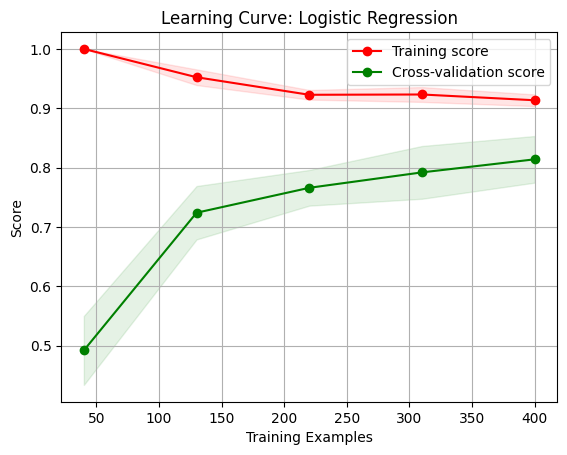

Classifier: Random Forest
Mean CV Accuracy: 0.8080 ± 0.0449


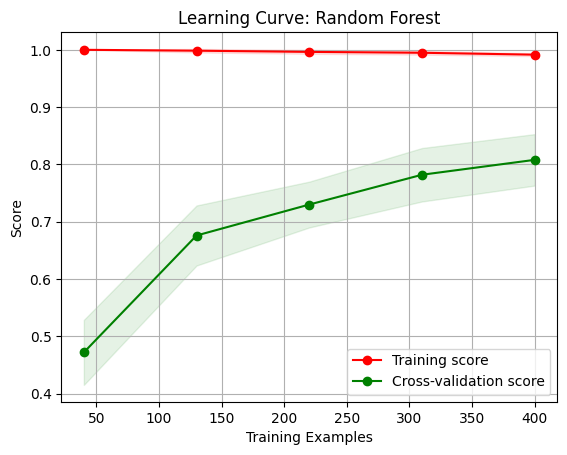

Classifier: SVM (Linear Kernel)
Mean CV Accuracy: 0.8360 ± 0.0422


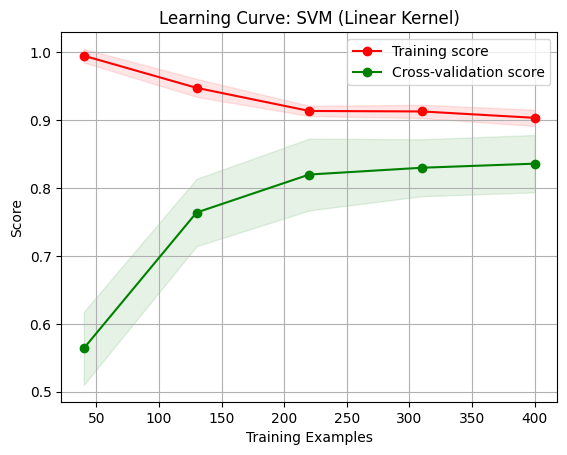

Classifier: XGBoost
Mean CV Accuracy: 0.7480 ± 0.0508


c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid clas

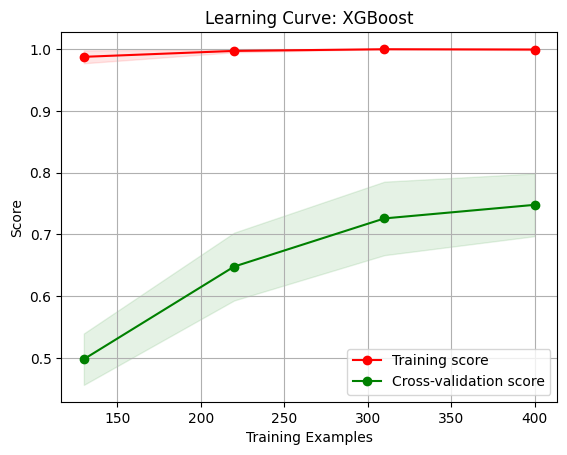

Classifier: Logistic Regression
Test Accuracy: 0.8800
Classification Report:
              precision    recall  f1-score   support

      Aquari       0.67      1.00      0.80         4
       Cybex       0.92      1.00      0.96        12
    Emotivor       1.00      0.88      0.93         8
      Faerix       0.91      0.71      0.80        14
     Florian       1.00      0.78      0.88         9
     Mythron       0.69      0.90      0.78        10
      Nexoon       1.00      0.86      0.92         7
     Quixnar       1.00      0.79      0.88        14
     Sentire       0.90      1.00      0.95         9
     Zorblax       0.81      1.00      0.90        13

    accuracy                           0.88       100
   macro avg       0.89      0.89      0.88       100
weighted avg       0.90      0.88      0.88       100

------------------------------------------------------------
Classifier: Random Forest
Test Accuracy: 0.8600
Classification Report:
              precision    recal

In [383]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense

# Load the dataset
path1 = "modified_data.csv"
data = pd.read_csv(path1)

# Handle missing messages by filling with an empty string
data['message'].fillna('', inplace=True)

# Encode the 'tail' column (yes = 1, no = 0)
data['tail'] = data['tail'].map({'yes': 1, 'no': 0})

# Vectorize the 'message' column using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features for performance
message_vectors = vectorizer.fit_transform(data['message'])

# Convert 'fingers' to numeric and get the feature matrix
X = pd.concat([data[['fingers', 'tail']].reset_index(drop=True), 
               pd.DataFrame(message_vectors.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

# Encode the target 'species' labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['species'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(
        C=2.229781329304629, class_weight=None, dual=False, fit_intercept=True,
        intercept_scaling=1, max_iter=1000, penalty='l2', solver='liblinear', tol=0.0001
    ),
    'Random Forest': RandomForestClassifier(
        criterion='entropy', max_depth=560, max_features='log2',
        min_samples_split=5, n_estimators=2000, random_state=42
    ),
    'SVM (Linear Kernel)': SVC(kernel='linear', random_state=0),
    'XGBoost': XGBClassifier(base_score=0.5, booster='gbtree', random_state=42)
}

# Dictionary to store the results
results = {}

# K-Fold Cross-Validation Setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to plot learning curve
def plot_learning_curve(estimator, X, y, cv, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)
    
    plt.title(f'Learning Curve: {model_name}')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Iterate through the classifiers and train/test each one
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    
    results[name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'cv_scores_mean': cv_scores.mean(),
        'cv_scores_std': cv_scores.std()
    }
    
    print(f"Classifier: {name}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    plot_learning_curve(clf, X, y, kfold, name)

# Print the results for test accuracy and classification report
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Test Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['classification_report'])
    print("-" * 60)

<p style="color:#FF4500;">
In the case of Logistic Regression and the SVM linear kernel, we observe high test accuracy. Additionally, from the training curve, we can see that it starts with high training accuracy and lower validation accuracy, but they gradually converge, indicating a well-fitting model.
<br><br>
On the other hand, for Random Forest and XGBoost, the cross-validation (CV) score is quite low, and the training and CV scores do not converge as we increase the number of training samples. This suggests potential overfitting or model issues.
</p>


Epoch 1/20


c:\Users\Legion\Desktop\eightfold\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1090 - loss: 2.3157 - val_accuracy: 0.1300 - val_loss: 2.3066
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1777 - loss: 2.2960 - val_accuracy: 0.3200 - val_loss: 2.2930
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2661 - loss: 2.2861 - val_accuracy: 0.3700 - val_loss: 2.2788
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3768 - loss: 2.2721 - val_accuracy: 0.4300 - val_loss: 2.2611
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4525 - loss: 2.2505 - val_accuracy: 0.4700 - val_loss: 2.2374
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5112 - loss: 2.2225 - val_accuracy: 0.4700 - val_loss: 2.2021
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4898 - loss: 2.1884 - val_accuracy: 0.4900 - val_loss: 2.1491
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5661 - loss: 2.1233 - val_accuracy: 0.4900 - val_loss: 2.0783
Ep

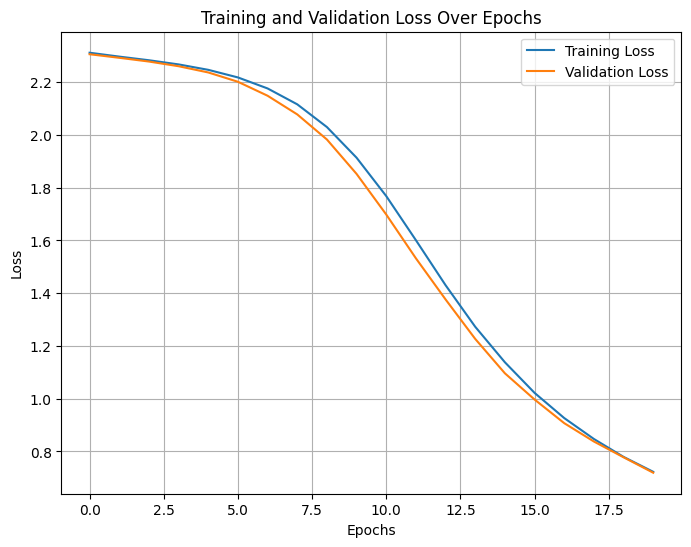

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.7289 
GRU Model Test Accuracy: 0.8300


In [393]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import GRU, Dense
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
path1 = "modified_data.csv"
data = pd.read_csv(path1)

# Handle missing messages by filling with an empty string
data['message'].fillna('', inplace=True)

# Encode the 'tail' column (yes = 1, no = 0)
data['tail'] = data['tail'].map({'yes': 1, 'no': 0})

# Vectorize the 'message' column using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
message_vectors = vectorizer.fit_transform(data['message'])

# Convert 'fingers' to numeric and get the feature matrix
X = pd.concat([data[['fingers', 'tail']].reset_index(drop=True), 
               pd.DataFrame(message_vectors.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

# Encode the target 'species' labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['species'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the GRU-based model
def build_model():
    model = Sequential()
    model.add(GRU(20, return_sequences=True, input_shape=(1, X_train.shape[1])))
    model.add(GRU(20, return_sequences=False))
    model.add(Dense(10, activation='softmax'))  # Adjusted for multiclass classification
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Reshape the input data for GRU
X_train_reshaped = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

# Instantiate and train the GRU model, tracking training history
gru_model = build_model()
history = gru_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Plotting the Training Loss and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped, y_test)
print(f"GRU Model Test Accuracy: {gru_accuracy:.4f}")

<span style="color: #FF4500;">Both the training loss and validation loss for the GRU model exhibit a steady decline across the epochs, demonstrating effective learning during the training process.</span> <br>
<span style="color: #FF4500;">The proximity of the two curves indicates a well-balanced model, suggesting that both the training and validation sets are being managed similarly by the model, with no significant signs of overfitting or underfitting.</span>


##### <h4 style="text-align: center; color: #FF7F7F;">For further processing, we are choosing SVM with linear kernel to be our model.</h4>
##### <h5 style="text-align: center; color: #FF4F7F;">(No overfitting , High Accuracy)</h5>

### <h2 id="final-training" style="text-align: center">6. Final Training</h2>


In [396]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import numpy as np

train_path = "modified_data.csv"
test_path = "test.csv"

data = pd.read_csv(train_path)

data['message'] = data['message'].fillna('')

data['tail'] = data['tail'].map({'yes': 1, 'no': 0})

# Vectorize the 'message' column using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
message_vectors = vectorizer.fit_transform(data['message'])

X = pd.concat([data[['fingers', 'tail']].reset_index(drop=True),
               pd.DataFrame(message_vectors.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['species'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear', random_state=0)

svm_clf.fit(X_train, y_train)

test_data = pd.read_csv(test_path)

test_data['message'] = test_data['message'].fillna('')

test_data['tail'] = test_data['tail'].map({'yes': 1, 'no': 0})

test_message_vectors = vectorizer.transform(test_data['message'])

X_test_final = pd.concat([test_data[['fingers', 'tail']].reset_index(drop=True),
                          pd.DataFrame(test_message_vectors.toarray(), columns=vectorizer.get_feature_names_out())],
                         axis=1)

test_predictions = svm_clf.predict(X_test_final)

test_pred_labels = label_encoder.inverse_transform(test_predictions)

output_df = pd.DataFrame({'Species': test_pred_labels})
output_df.to_csv("result.csv", index=False)

print("Predictions saved to result.csv.")

Predictions saved to result.csv.
